In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def evolution_strategy(f, population_size, sigma, lr, initial_params, num_iters):
  # assume initial params is a 1D array
  num_params = len(initial_params)
  reward_per_iteration = np.zeros(num_iters)

  params = initial_params
  for t in range(num_iters):
    noises = np.random.randn(population_size, num_params)
    rewards = np.zeros(population_size)

    # loop through each offspring
    for j in range(population_size):
      params_try = params + sigma * noises[j]
      rewards[j] = f(params_try)

    mean = rewards.mean()
    advantage = (rewards - mean) / rewards.std()
    reward_per_iteration[t] = mean
    params = params + lr / (population_size * sigma) * np.dot(noises.T, advantage)

  return params, reward_per_iteration

In [ ]:
def reward_function(params):
  return -(params[0] ** 2 + 0.1 * (params[1] - 1) ** 2 + 0.5 * (params[2] + 2) ** 2)

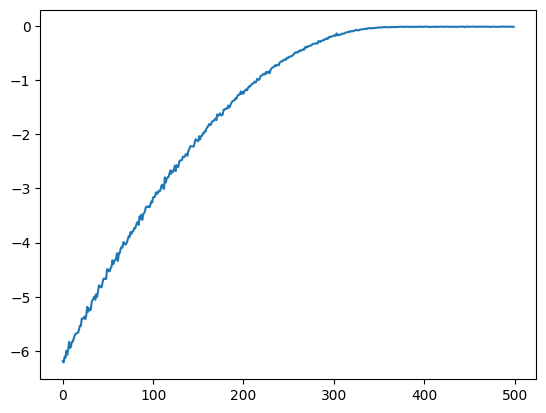

In [ ]:
best_params, rewards = evolution_strategy(
    f=reward_function,
    population_size=50,
    sigma=0.1,
    lr=1e-3,
    initial_params=np.random.randn(3),
    num_iters=500,
)

# plot the rewards per iteration
plt.plot(rewards)

In [ ]:
print("Final params:", best_params)

Final params: [-1.81011192e-03  1.01516863e+00 -2.00143640e+00]
